In [1]:
# Python program for color identification in images

# Importing libraries
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import cv2
import numpy as np
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is<class 'numpy.ndarray'>
Shape: (960, 640, 3)


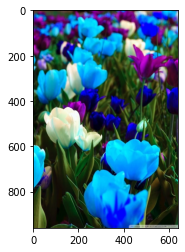

In [2]:
# Read the image
image = cv2.imread('flowers.jpg')
print("The type of this input is{}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

In [3]:
# Convert image
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [4]:
#Get hex values
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

# Get colors from image
def get_colors(image, number_of_colors, show_chart):
    # Resize image
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
   
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    center_colors = clf.cluster_centers_
 
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
     plt.figure(figsize = (8,6))
     plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors


[array([210.18661557, 232.59483097, 229.32193396]),
 array([22.70367387, 61.17678875, 33.95995282]),
 array([111.08351293, 146.30064655, 118.75872845]),
 array([239.32862063, 155.47303788,   5.08623346]),
 array([168.69805242,  23.90496412, 140.67667301]),
 array([234.30592787,  11.58311455,   6.35650131]),
 array([143.96282388, 114.35686569,  22.66478908]),
 array([123.55962954,  18.0296879 ,  11.4007866 ]),
 array([46.72367862, 94.613564  , 69.03056676]),
 array([217.83381281,  95.56108554,   9.44275029]),
 array([10.3024939 , 25.56484966, 17.23979486]),
 array([251.57908869, 202.39674588,   6.82587264]),
 array([177.13295248, 189.54011945, 160.29304077]),
 array([102.72469213,  19.24170319,  94.02358589]),
 array([51.63803637, 13.61331129, 36.16351614])]

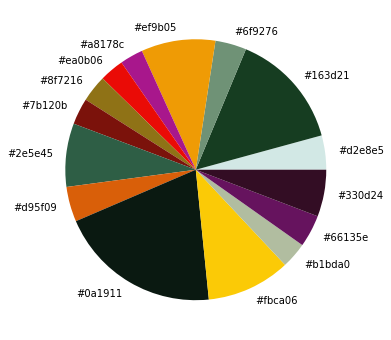

In [8]:
# Find the required number of colors
get_colors(get_image('flowers.jpg'), 15, True)